![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
12553,id_8879,London,['Pizza'],8888.0,NaN,NaN,"[['My hero - saved the day.'], ['08/06/2014']]",/Restaurant_Review-g186338-d5243162-Reviews-Pi...,d5243162,1,5.0
42266,id_5525,Berlin,"['Vegetarian Friendly', 'Vegan Options', 'Glut...",5527.0,$$ - $$$,62.0,"[['Pure marketing, but good food', 'Delicious ...",/Restaurant_Review-g187323-d12428601-Reviews-A...,d12428601,1,3.0
6478,id_6478,Lisbon,"['Mediterranean', 'European', 'Portuguese', 'W...",127.0,$$ - $$$,1535.0,"[['What a way to end the trip...', 'Wine tasti...",/Restaurant_Review-g189158-d1910972-Reviews-Gr...,d1910972,0,0.0
2548,id_2548,London,"['Pub', 'Bar']",7349.0,$$ - $$$,13.0,"[['What a lovely surprise!', 'Always excellent...",/Restaurant_Review-g186338-d8614523-Reviews-Th...,d8614523,0,0.0
47462,id_21,Krakow,"['Italian', 'Polish', 'Mediterranean', 'Europe...",22.0,$$ - $$$,760.0,[['Nice place but main course were poorly exe....,/Restaurant_Review-g274772-d2369590-Reviews-Re...,d2369590,1,4.5


In [14]:

print(data['Reviews'][2][-13:-3])

12/06/2017


In [15]:
# блок, где мы преобразуем столбец обзоров в релевантные данные
#. взял мелкую выборку для тренировки 

def data_make(data, ser):
    ser2 = list()
    for i in range(len(data[ser])):
        if str(data[ser][i]).find('/') != -1:
            ser2.append(data[ser][i][-13:-3])
        else:
            ser2.append('NaN')
    ser2 = pd.to_datetime(ser2, infer_datetime_format=True) 
    return ser2
        
def DoW(ser):
    ser2 = list()
    for i in range(len(ser)):
        if ser[i] != 'NaT':
            ser2.append(ser[i].dayofweek)
        else:
            ser2.append(ser[i])
    return ser2
    #ser.fillna(ser.dropna().value_couns.max())

def year(ser):
    ser2=list()
    for i in range(len(ser)):
        if ser[i] != 'NaT':
            ser2.append(ser[i].year)
        else:
            ser2.append(ser[i])
    return ser2
    
df = data[0:20]
data2 = data_make(df , 'Reviews' )
data3 = DoW(data2)
dataY = year(data2)
df['year']= dataY
df['wd']=data3
df['WDNAN'] = pd.isna(df['wd']).astype('uint8')
df.wd = df.wd.fillna(df.wd.value_counts().max())
df['YNAN'] = pd.isna(df['year']).astype('uint8')
df.year = df.year.fillna(df.year.value_counts().index[0])

df

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,year,wd,WDNAN,YNAN
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,2017.0,5.0,1,1
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,2017.0,6.0,0,0
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638,0,0.0,2017.0,2.0,0,0
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417,0,0.0,2017.0,2.0,0,0
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354,0,0.0,2018.0,2.0,0,0
5,id_5,Paris,"['French', 'Cafe', 'Fast Food']",5093.0,$,24.0,"[['Lunch Break', 'Good to Quick Bite'], ['09/0...",/Restaurant_Review-g187147-d8458643-Reviews-Le...,d8458643,0,0.0,2017.0,5.0,0,0
6,id_6,Lisbon,"['European', 'Portuguese']",3704.0,$,2.0,"[[], []]",/Restaurant_Review-g189158-d8758873-Reviews-Li...,d8758873,0,0.0,2017.0,5.0,1,1
7,id_7,Budapest,NaN,2330.0,NaN,NaN,"[[], []]",/Restaurant_Review-g274887-d8286886-Reviews-Be...,d8286886,0,0.0,2017.0,5.0,1,1
8,id_8,Helsinki,"['European', 'Scandinavian']",771.0,NaN,2.0,"[['Big group supper', 'Good food but very slow...",/Restaurant_Review-g189934-d12947542-Reviews-B...,d12947542,0,0.0,2017.0,2.0,0,0
9,id_9,Stockholm,['Italian'],605.0,NaN,13.0,"[['Good food', 'Good pizza'], ['12/02/2017', '...",/Restaurant_Review-g189852-d12716384-Reviews-I...,d12716384,0,0.0,2017.0,6.0,0,0


In [16]:
# тепеь применяем на датасет
data2 = data_make(data, 'Reviews')
data3 = DoW(data2)
data['wd']=data3
data['WDNAN'] = pd.isna(data['wd']).astype('uint8')
data.wd = data.wd.fillna(data.wd.value_counts().index[0])
data.sample(5)
dataY = year(data2)
data['year']= dataY
data['YNAN'] = pd.isna(data['year']).astype('uint8')
data.year = data.year.fillna(data.year.value_counts().index[0])

In [17]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,wd,WDNAN,year,YNAN
2547,id_2547,Paris,"['French', 'European']",4666.0,$$ - $$$,98.0,"[['Friendly, good food, good price', 'Charmy S...",/Restaurant_Review-g187147-d2169983-Reviews-La...,d2169983,0,0.0,1.0,0,2016.0,0
19770,id_105,Brussels,"['Italian', 'Mediterranean', 'Vegetarian Frien...",106.0,$$ - $$$,69.0,"[['Good, fast and excellent price/quality', 'E...",/Restaurant_Review-g188644-d11855874-Reviews-A...,d11855874,1,4.5,3.0,0,2017.0,0
42542,id_405,Amsterdam,"['Dutch', 'Bar', 'European', 'Pub', 'Vegetaria...",406.0,$$ - $$$,200.0,"[['Great lunch stop', 'It keeps calling me bac...",/Restaurant_Review-g188590-d2198130-Reviews-My...,d2198130,1,4.5,0.0,0,2017.0,0
37579,id_843,Prague,"['Lebanese', 'Mediterranean', 'Middle Eastern'...",844.0,$$ - $$$,118.0,"[['Good Lebanese food', 'Nice middle Eastern f...",/Restaurant_Review-g274707-d3544293-Reviews-Kl...,d3544293,1,4.0,6.0,0,2017.0,0
49819,id_4534,Paris,['Thai'],4535.0,$,51.0,"[['A good address for a Thai curry', 'Profound...",/Restaurant_Review-g187147-d5800493-Reviews-Sp...,d5800493,1,4.0,3.0,0,2017.0,0


Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак 

In [18]:
# Для примера я возьму столбец Number of Reviews
data['Number_of_Reviews_isNAN'] = pd.isna(data['Number of Reviews']).astype('uint8')

In [19]:
data['Number_of_Reviews_isNAN']

0        0
1        0
2        0
3        0
4        0
        ..
49995    0
49996    0
49997    0
49998    0
49999    0
Name: Number_of_Reviews_isNAN, Length: 50000, dtype: uint8

In [20]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
data['Number of Reviews'].fillna(0, inplace=True)

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [21]:
data.nunique(dropna=False)

Restaurant_id              13094
City                          31
Cuisine Style              10732
Ranking                    12975
Price Range                    4
Number of Reviews           1574
Reviews                    41858
URL_TA                     49963
ID_TA                      49963
sample                         2
Rating                        10
wd                             7
WDNAN                          2
year                          13
YNAN                           2
Number_of_Reviews_isNAN        2
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

In [22]:
# делаем ранки внутри городов, а не только всеобщие
# эта предобработка добавлена после визуализации данных, но стоит здесь т.к. следующим шагом мы разбиваем "City" на дамми переменные
data['rank_for_city'] = 0
data['rank_for_city']=data['rank_for_city'].astype(np.float64)
for i in range(len(data['City'])):
    col = len(data[data.City == data.City[i]])
    data['rank_for_city'][i] = float(data['Ranking'][i]) / float(col)
    
    

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [23]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,wd,WDNAN,year,YNAN,Number_of_Reviews_isNAN,rank_for_city
5153,id_5153,Amsterdam,"['Italian', 'Mediterranean', 'European', 'Vege...",496.0,$$ - $$$,312.0,"[['Very good', 'Great food'], ['11/13/2017', '...",/Restaurant_Review-g188590-d2190969-Reviews-Re...,d2190969,0,0.0,4.0,0,2017.0,0,0,0.361516
5721,id_5721,Budapest,"['Japanese', 'Barbecue', 'European', 'Asian', ...",595.0,$$ - $$$,129.0,"[['For eating Hungarian Food', '2018 New Year ...",/Restaurant_Review-g274887-d5777980-Reviews-Tr...,d5777980,0,0.0,0.0,0,2018.0,0,0,0.582762
15773,id_7254,London,"['Japanese', 'Asian', 'Vegetarian Friendly']",7263.0,$$ - $$$,61.0,"[['Good Anglo - Japanese food', 'Great place t...",/Restaurant_Review-g186338-d754598-Reviews-Wag...,d754598,1,3.5,6.0,0,2017.0,0,0,1.009732
6288,id_6288,Paris,['French'],8290.0,$$ - $$$,0.0,"[[], []]",/Restaurant_Review-g187147-d12567720-Reviews-C...,d12567720,0,0.0,6.0,1,2017.0,1,1,1.357236
46465,id_2261,Hamburg,NaN,2265.0,NaN,2.0,"[['Beguette'], ['02/15/2017']]",/Restaurant_Review-g187331-d9805921-Reviews-Su...,d9805921,1,4.0,2.0,0,2017.0,0,0,1.909781


In [24]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.get_dummies(data, columns=[ 'City',], dummy_na=True)

In [25]:
data.sample(5)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
25711,id_2198,"['Belgian', 'European']",2199.0,NaN,12.0,"[[], []]",/Restaurant_Review-g187265-d6948258-Reviews-Wa...,d6948258,1,3.5,...,0,0,0,0,0,0,0,0,0,0
14318,id_627,NaN,628.0,NaN,14.0,"[['Cute and unusual cafe', ""Cool place to visi...",/Restaurant_Review-g274856-d11925969-Reviews-W...,d11925969,1,4.0,...,0,0,0,0,0,0,0,1,0,0
34515,id_13160,['Fast Food'],13162.0,$,69.0,"[['Amazing kebab!', 'Low cost in Tourist area'...",/Restaurant_Review-g187147-d3572924-Reviews-Na...,d3572924,1,3.0,...,0,0,1,0,0,0,0,0,0,0
29976,id_4292,NaN,4293.0,NaN,0.0,"[['Great takeout breakfast and lunch!'], ['02/...",/Restaurant_Review-g187497-d12152093-Reviews-P...,d12152093,1,5.0,...,0,0,0,0,0,0,0,0,0,0
8787,id_8787,"['Italian', 'Pizza', 'Vegetarian Friendly', 'V...",252.0,$$ - $$$,904.0,"[[""Nicey Done, Giuliano's"", 'Pre Theatre Dinne...",/Restaurant_Review-g186525-d897139-Reviews-Giu...,d897139,0,0.0,...,0,0,0,0,0,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [26]:
data['Price Range'].value_counts()

$$ - $$$    23041
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [27]:
# Ваша обработка 'Price Range'
for i in range(len(data['Price Range'])):
    if data['Price Range'][i] == '$':
        data['Price Range'][i]= 1
    elif data['Price Range'][i]== '$$ - $$$':
        data['Price Range'][i]=2
    elif data['Price Range'][i]== '$$$$':
        data['Price Range'][i]=3

        
#data['Price Range'] = data['Price Range'].fillna(data['Price Range'].mean())
data['Price Range'] = data['Price Range'].fillna(data['Price Range'].mean())
for i in range(len(data['Price Range'])):
    if data['Price Range'][i] == 'Nan':
        mn = data[data['City'] == data['City'][i]]['Price Range'].mean()
        data['Price Range'][i] = mn

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [28]:
data['Price Range'].value_counts()
# теперь МЛ модель может принять этот список

2.000000    23041
1.815129    17361
1.000000     7816
3.000000     1782
Name: Price Range, dtype: int64

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

In [29]:
# тут ваш код на обработку других признаков
# кухня
for i in range(len(data['Cuisine Style'])):
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace("[", "")
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace("]", "")
    data['Cuisine Style'][i] = str(data['Cuisine Style'][i]).replace(" ", "")

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [30]:
# множество видов кухни
#styles = set()
#for i in range(len(data['Cuisine Style'])):
#    s=list(data['Cuisine Style'][i].split(','))
#    for j in range(len(s)):
#        styles.add(s[j])
# создаем из кухонь дамми-переменные, как с городами 
#len(styles)

In [31]:
#cdf = pd.DataFrame( columns = styles)
#for i in range(len(data['Cuisine Style'])):
#    s=[]
#    for j in range(len(cdf.columns)):
#        if cdf.columns[j] in data['Cuisine Style'][i]:
#            s.append(1)
#        else:
#            s.append(0)
#    s = pd.DataFrame( [s] , columns = styles)
#    cdf = pd.concat([cdf, s])

In [32]:
#cdf.sample(4)
#cdf. info

In [33]:
# добавляем дамми-переменные по виду кухни, которая представленна в ресторане
#data = pd.concat([data , cdf], axis =1)

# этот блок мы не используем из-за сложности вычислений и, как следсктиве, очень долгой обработке кода

In [34]:
data.head(2)

,Restaurant_id,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
0,id_0,"'Bar','Pub'",12963.0,2.0,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918,0,0.0,...,0,0,1,0,0,0,0,0,0,0
1,id_1,"'European','Scandinavian','GlutenFreeOptions',...",106.0,2.0,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944,0,0.0,...,0,0,0,0,0,0,0,0,0,0


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

### Посмотрим распределение признака

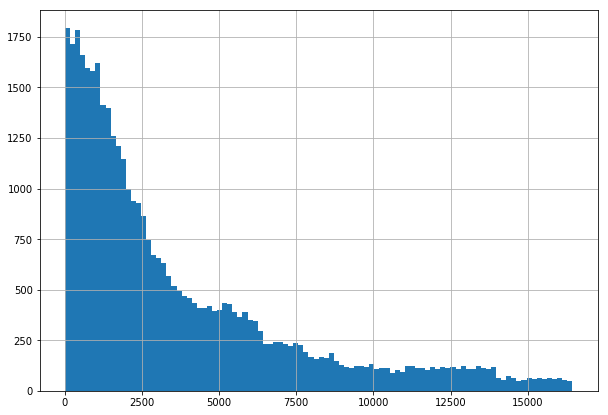

In [35]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

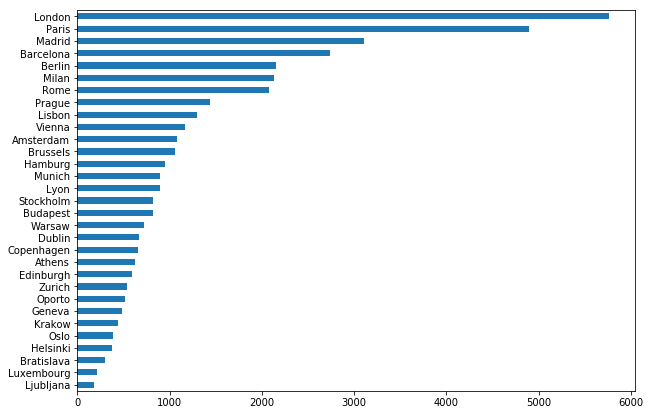

In [36]:
df_train['City'].value_counts(ascending=True).plot(kind='barh')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

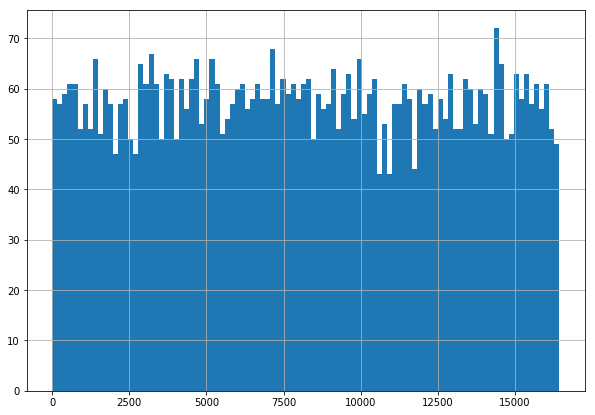

In [37]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

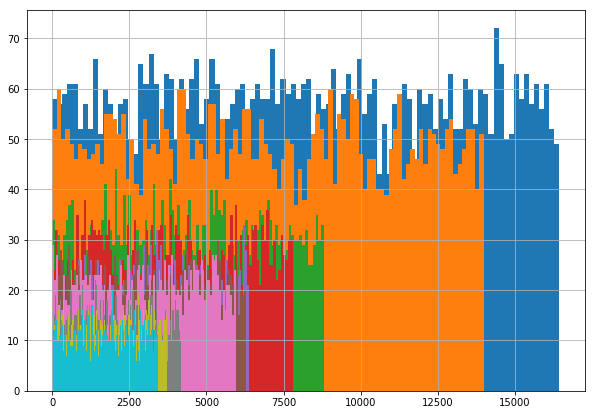

In [38]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =) 


### Посмотрим распределение целевой переменной

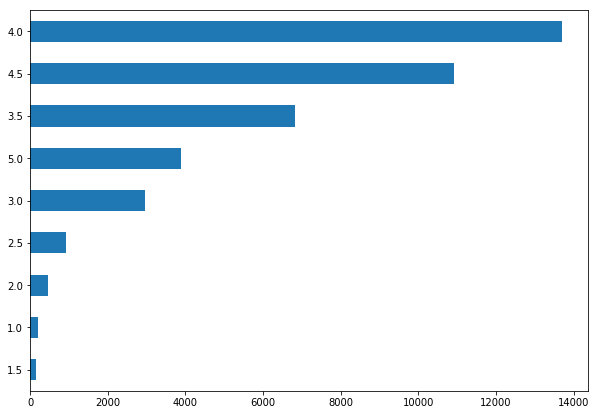

In [39]:
df_train['Rating'].value_counts(ascending=True).plot(kind='barh')

### Посмотрим распределение целевой переменной относительно признака

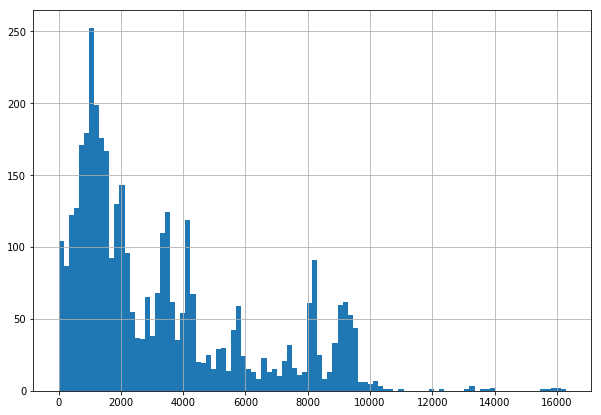

In [40]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

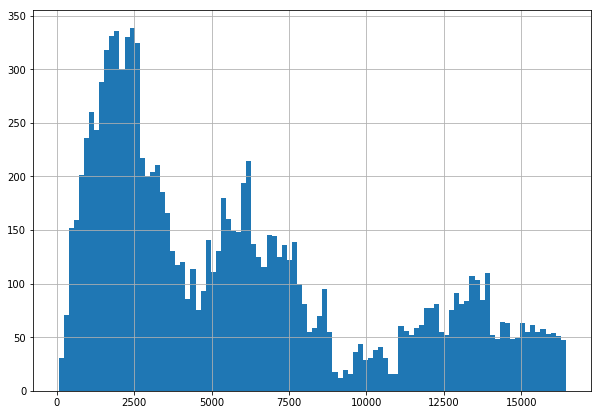

In [41]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

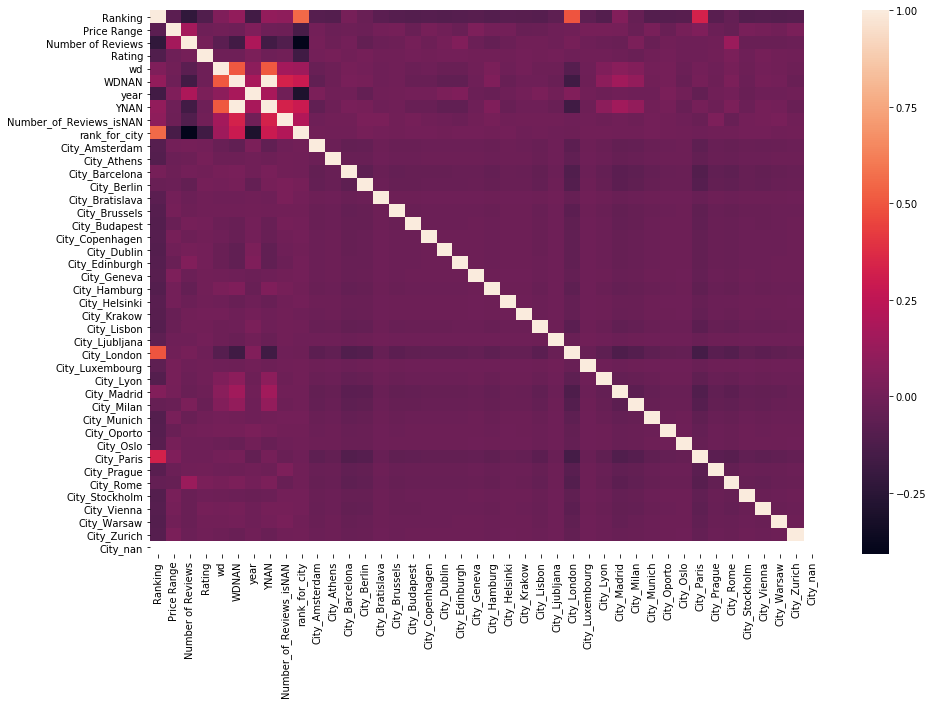

In [42]:
plt.rcParams['figure.figsize'] = (15,10)
sns.heatmap(data.drop(['sample'], axis=1).corr(),)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [43]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [44]:
def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(0, inplace=True)
    # тут ваш код по обработке NAN
    #'Price Range'
    for i in range(len(df_output['Price Range'])):
        if df_output['Price Range'][i] == '$':
            df_output['Price Range'][i]= 1
        elif df_output['Price Range'][i]== '$$ - $$$':
            df_output['Price Range'][i]=2
        elif df_output['Price Range'][i]== '$$$$':
            df_output['Price Range'][i]=3
    df_output['Price Range'] = df_output['Price Range'].fillna(df_output['Price Range'].mean())
    for i in range(len(df_output['Price Range'])):
        if df_output['Price Range'][i] == 'NaN':
            mn = df_output[data['City'] == df_output['City'][i]]['Price Range'].mean()
            df_output['Price Range'][i] = mn
            
    # делаем ранки внутри городов, а не только всеобщие
    
    
    
    # эта предобработка добавлена после визуализации данных, но стоит здесь т.к. следующим шагом мы разбиваем "City" на дамми переменные
    df_output['rank_for_city'] = 0
    df_output['rank_for_city']=df_output['rank_for_city'].astype(np.float64)
    for i in range(len(df_output['City'])):
        col = len(df_output[df_output.City == df_output.City[i]])
        df_output['rank_for_city'][i] = float(df_output['Ranking'][i]) / float(col)
        
    # тут ваш код не Encoding фитчей. я переместил этот блок выше
    data2 = data_make(df_output, 'Reviews')
    data3 = DoW(data2)
    df_output['wd']=data3
    df_output['WDNAN'] = pd.isna(df_output['wd']).astype('uint8')
    df_output.wd = df_output.wd.fillna(df_output.wd.value_counts().index[0])
    dataY = year(data2)
    df_output['year']= dataY
    df_output['YNAN'] = pd.isna(df_output['year']).astype('uint8')
    df_output.year = df_output.year.fillna(df_output.year.value_counts().index[0])
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.get_dummies(df_output, columns=[ 'City',], dummy_na=True)

    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП). 

#### Запускаем и проверяем что получилось

In [45]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be s

,Ranking,Price Range,Number of Reviews,sample,Rating,rank_for_city,wd,WDNAN,year,YNAN,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
8082,306.0,2.000000,445.0,0,0.0,0.299706,3.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
7107,1520.0,2.000000,24.0,0,0.0,0.561922,1.0,0,2015.0,0,...,0,0,0,0,0,0,0,0,0,0
3079,616.0,2.000000,68.0,0,0.0,0.596321,1.0,0,2016.0,0,...,0,0,0,0,0,1,0,0,0,0
32351,13412.0,2.000000,31.0,1,3.5,1.864591,0.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
6108,580.0,2.000000,23.0,0,0.0,0.627027,4.0,0,2017.0,0,...,0,0,0,0,0,0,0,1,0,0
37550,1963.0,2.000000,55.0,1,4.0,0.728656,0.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
4477,1683.0,1.000000,18.0,0,0.0,1.021858,1.0,0,2016.0,0,...,0,0,0,0,0,0,0,0,0,0
47991,5464.0,2.000000,102.0,1,4.5,0.759627,1.0,0,2016.0,0,...,0,0,0,0,0,0,0,0,0,0
13115,361.0,2.000000,37.0,1,4.5,0.651625,6.0,0,2017.0,0,...,0,0,0,0,0,0,0,0,0,0
4684,1394.0,1.815129,12.0,0,0.0,1.238011,0.0,0,2015.0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 42 columns):
Ranking              50000 non-null float64
Price Range          50000 non-null float64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
rank_for_city        50000 non-null float64
wd                   50000 non-null float64
WDNAN                50000 non-null uint8
year                 50000 non-null float64
YNAN                 50000 non-null uint8
City_Amsterdam       50000 non-null uint8
City_Athens          50000 non-null uint8
City_Barcelona       50000 non-null uint8
City_Berlin          50000 non-null uint8
City_Bratislava      50000 non-null uint8
City_Brussels        50000 non-null uint8
City_Budapest        50000 non-null uint8
City_Copenhagen      50000 non-null uint8
City_Dublin          50000 non-null uint8
City_Edinburgh       50000 non-null uint8
City_Geneva          50000 non-null u

In [47]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [48]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [49]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 41), (40000, 41), (40000, 40), (32000, 40), (8000, 40))

# Model 
Сам ML

In [50]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [51]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [52]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [53]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.206599375


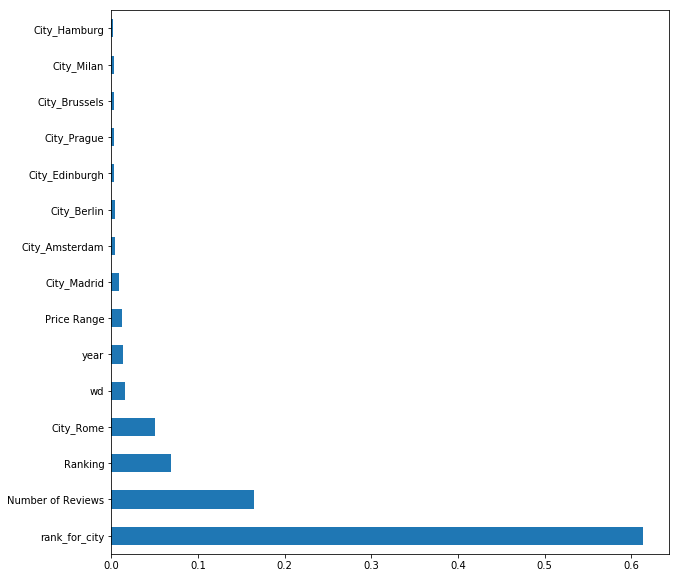

In [54]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [55]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,rank_for_city,wd,WDNAN,year,YNAN,City_Amsterdam,...,City_Oporto,City_Oslo,City_Paris,City_Prague,City_Rome,City_Stockholm,City_Vienna,City_Warsaw,City_Zurich,City_nan
6868,1860.0,3.000000,804.0,0.0,0.304519,4.0,0,2017.0,0,0,...,0,0,1,0,0,0,0,0,0,0
7293,1805.0,1.815129,4.0,0.0,2.159091,4.0,0,2016.0,0,0,...,0,0,0,0,0,0,0,0,0,0
903,10595.0,1.815129,10.0,0.0,1.734610,3.0,0,2017.0,0,0,...,0,0,1,0,0,0,0,0,0,0
2473,13380.0,2.000000,44.0,0.0,1.860142,6.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0
6196,1153.0,1.815129,13.0,0.0,0.799030,1.0,0,2016.0,0,0,...,0,0,0,0,0,0,1,0,0,0
402,1493.0,1.815129,4.0,0.0,1.325933,6.0,1,2017.0,1,0,...,0,0,0,0,0,0,0,0,0,0
4235,3374.0,1.815129,42.0,0.0,1.303206,6.0,1,2017.0,1,0,...,0,0,0,0,1,0,0,0,0,0
6933,14705.0,2.000000,0.0,0.0,2.044349,3.0,0,2015.0,0,0,...,0,0,0,0,0,0,0,0,0,0
7475,831.0,3.000000,134.0,0.0,0.217939,4.0,0,2012.0,0,0,...,0,0,0,0,0,0,0,0,0,0
3779,171.0,1.000000,124.0,0.0,0.220361,1.0,0,2017.0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
test_data = test_data.drop(['Rating'], axis=1)

In [57]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [58]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [59]:
predict_submission

array([3.11 , 4.24 , 4.575, ..., 3.06 , 4.505, 4.36 ])

In [60]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.110
1,id_1,4.240
2,id_2,4.575
3,id_3,4.270
4,id_4,4.500
5,id_5,4.535
6,id_6,2.150
7,id_7,2.605
8,id_8,4.085
9,id_9,4.610


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!
